In [1]:
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import pylab
import gc

In [62]:
def linear_regression(X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    b = np.linalg.inv(X.T@X)@X.T@y
    return b

def rmse(slopes, X_test, y_test):
    X_test = pd.get_dummies(X_test, drop_first = True)._get_numeric_data().values
    intercept_col = np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
    X_test = np.hstack((intercept_col, X_test))
    
    y_val_pred = X_test @ b
    y_val = y_test.values
    return np.sqrt(((y_val - y_val_pred) ** 2).mean())
    
def train_test_split(frac, X, response = 'Volume Sold (Gallons)'):
    X_train = X.sample(frac = frac)
    X_test = X.drop(X_train.index, axis = 0)
    
    y_train = X_train[response]
    X_train = X_train.drop(['County','Area Name',response], axis = 1)
    
    y_test = X_test[response]
    X_test = X_test.drop(['County','Area Name',response], axis = 1)
    
    
    return X_train,X_test, y_train, y_test

def r2(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    
    y_val_pred = X @ b
    ss_res = ((y - y_val_pred) ** 2).sum()
    return 1 - (ss_res/ss_tot)

def qqplot(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    y_val_pred = X @ b

    stats.probplot(y - y_val_pred, dist="norm", plot=pylab)
    pylab.show()

def aic(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    y_val_pred = X @ b
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    ss_res = ((y - y_val_pred) ** 2).sum()
    sigmasq = ss_tot / X.shape[0]
    p = X.shape[1]
    
    return (ss_res + 2 *(p * sigmasq)) / ss_tot

def bic(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    y_val_pred = X @ b
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    ss_res = ((y - y_val_pred) ** 2).sum()
    sigmasq = ss_tot / X.shape[0]
    p = X.shape[1]
    n = X.shape[0]
    
    return (ss_res + (np.log(n) * p * sigmasq)) / ss_tot


In [3]:
df = pd.read_csv("data/iowaliquor.csv")
# df_sample = pd.read_csv("data/iowa-sample.csv")

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_raw_employment = pd.read_csv("data/Iowa_Quarterly_Census_of_Employment_and_Wage_data__Statewide_and_County_.csv")
df_raw_employment.fillna(0)

,Year,Quarter,Area Type,Area Name,Industry,Description,Locations,Month 1,Month 2,Month 3,Average Emp,Wages,Average Wage
0,2011,1,Statewide,Statewide,11.0,"Agriculture, Forestry, Fishing & Hunt",1921.0,14343.0,14504.0,14895.0,14581.0,1.204824e+08,8263.0
1,2011,1,Statewide,Statewide,21.0,"Mining, Quarrying, & Oil & Gas Extrac",186.0,1638.0,1811.0,1818.0,1756.0,1.679560e+07,9567.0
2,2011,1,Statewide,Statewide,22.0,Utilities,449.0,8330.0,8288.0,8328.0,8315.0,1.593543e+08,19164.0
3,2011,1,Statewide,Statewide,23.0,Construction,8994.0,52324.0,51154.0,53629.0,52369.0,5.506093e+08,10514.0
4,2011,1,Statewide,Statewide,31.0,Manufacturing,3985.0,201803.0,202120.0,203641.0,202521.0,2.454029e+09,12117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230382,2015,2,County,Benton,515.0,Broadcasting (except Internet),0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
230383,2015,2,County,Benton,517.0,Telecommunications,6.0,38.0,38.0,37.0,38.0,4.717600e+05,12525.0
230384,2015,2,County,Benton,518.0,"Data Processing, Hosting, Related",0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
230385,2015,2,County,Benton,519.0,Other Information Services,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0


In [5]:
df_employement = pd.pivot_table(df_raw_employment,
               index = ["Year", "Quarter", "Area Name"],
               values = ["Average Emp", "Wages"],
               aggfunc = np.sum
              ).reset_index()

df_employement["Area Name"] = df_employement["Area Name"].str.lower()

In [6]:
df_employement["Year"] = df_employement["Year"].astype('str')
df_employement["Quarter"] = df_employement["Quarter"].astype('str')

In [7]:
df_employement

,Year,Quarter,Area Name,Average Emp,Wages
0,2011,1,adair,3937.0,2.470082e+07
1,2011,1,adams,1447.0,1.053484e+07
2,2011,1,allamakee,8444.0,5.872753e+07
3,2011,1,appanoose,7032.0,4.989157e+07
4,2011,1,audubon,2397.0,1.598665e+07
...,...,...,...,...,...
1702,2015,2,allamakee,9048.0,6.917666e+07
1703,2015,2,appanoose,7370.0,5.880329e+07
1704,2015,2,audubon,2324.0,1.952107e+07
1705,2015,2,benton,4967.0,4.327912e+07


In [8]:
df["County"] = df["County"].str.lower()

In [9]:
df["Year"] = pd.DatetimeIndex(df['Date']).year
df["Quarter"] = pd.DatetimeIndex(df['Date']).quarter

In [10]:
df["Year"] = df["Year"].astype('str')
df["Quarter"] = df["Quarter"].astype('str')
df["Pack"] = df["Pack"].astype('str')

In [11]:
GROUP_VARIABLES = ['County','Year','Quarter']
NUMERIC_VARIABLES = ['Bottle Volume (ml)','State Bottle Cost', 'State Bottle Retail',
                     'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']

df_agg =  pd.pivot_table(df, 
                        index = GROUP_VARIABLES,
                        values = NUMERIC_VARIABLES,
                        aggfunc = np.sum).reset_index().merge(df_employement, 'inner', left_on = ['Year','County', 'Quarter'], right_on = ['Year','Area Name', 'Quarter']).dropna()

In [12]:
#---------------------------------
# SALE (DOLLARS) AS RESPONSE VARIABLE
#---------------------------------

In [70]:
X_train,X_test, y_train, y_test = train_test_split(.5, df_agg,'Sale (Dollars)')

In [71]:
DEP_VARS = ["Year","Quarter","Average Emp", "Wages"]
b = linear_regression(X_train[DEP_VARS], y_train)
r2(b, X_train[DEP_VARS], y_train),rmse(b, X_test[DEP_VARS], y_test)

(0.9747809890552095, 262021.0856641039)

In [72]:
aic(b,X_test[DEP_VARS],y_test),bic(b,X_test[DEP_VARS],y_test)

(0.0499642241097899, 0.11217615092664941)

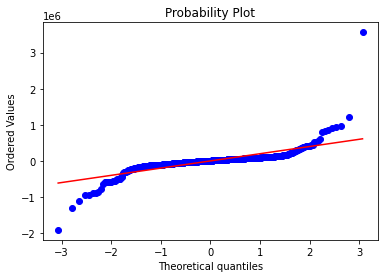

In [17]:
qqplot(b, X_train[DEP_VARS], y_train)

In [18]:
#---------------------------------
# VOLUME SOLD AS RESPONSE VARIABLE
#---------------------------------

In [39]:
X_train,X_test, y_train, y_test = train_test_split(.5, df_agg,'Volume Sold (Gallons)')

In [40]:
X_train

,Year,Quarter,Bottle Volume (ml),Bottles Sold,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Liters),Average Emp,Wages
1231,2012,4,2011201,13836,174753.48,18312.87,27573.34,14746.15,7871.0,6.532405e+07
1217,2012,3,6678905,57256,711823.06,64013.45,96233.42,54044.13,32882.0,3.061191e+08
607,2012,4,1244475,8272,115213.28,11493.00,17263.56,9051.73,5343.0,5.407745e+07
839,2012,2,931676,8285,95281.72,7698.69,11586.74,8280.57,6223.0,5.187107e+07
1276,2014,2,751400,4677,57857.12,6701.44,10078.49,4948.18,2795.0,2.140323e+07
...,...,...,...,...,...,...,...,...,...,...
505,2013,2,907350,5613,65383.90,7711.42,11603.70,5516.90,5701.0,4.856107e+07
401,2013,2,14897450,143279,1885358.28,141579.43,212978.20,141362.30,112795.0,1.063531e+09
1181,2013,2,4467025,40433,512740.41,40047.62,60264.88,41262.79,18759.0,1.561962e+08
712,2013,1,3170050,26034,359046.17,29648.74,44556.00,29391.31,11803.0,1.043757e+08


In [41]:
DEP_VARS = ["Year","Quarter","Average Emp", "Wages"]
b = linear_regression(X_train[DEP_VARS], y_train)
r2(b, X_train[DEP_VARS], y_train),rmse(b, X_test[DEP_VARS], y_test)

(0.9808565640796545, 4876.857656325164)

In [64]:
aic(b,X_test[DEP_VARS],y_test),bic(b,X_test[DEP_VARS],y_test)

(0.05025570366098569, 0.1124676304778452)

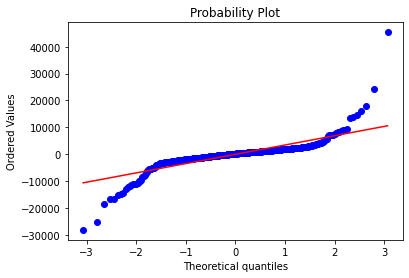

In [22]:
qqplot(b, X_train[DEP_VARS], y_train)

In [65]:
DEP_VARS2 = ["Year","Quarter","Average Emp"]
b = linear_regression(X_train[DEP_VARS2], y_train)
r2(b, X_train[DEP_VARS2], y_train), rmse(b, X_test[DEP_VARS2], y_test)

(0.9806162718623509, 4577.487547390349)

In [66]:
aic(b,X_test[DEP_VARS2],y_test),bic(b,X_test[DEP_VARS2],y_test)

(0.044494670920302515, 0.09979416142417764)

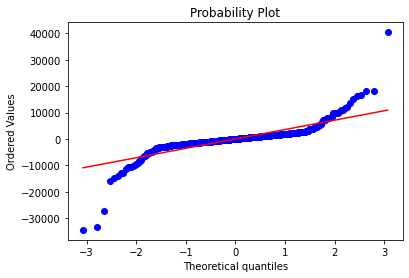

In [24]:
qqplot(b, X_train[DEP_VARS2], y_train)

In [68]:
DEP_VARS3 = ["Year","Quarter","Wages"]
b = linear_regression(X_train[DEP_VARS3], y_train)
r2(b, X_train[DEP_VARS3], y_train), rmse(b, X_test[DEP_VARS3], y_test)

(0.975011243018714, 7154.012876845848)

In [69]:
aic(b,X_test[DEP_VARS3],y_test),bic(b,X_test[DEP_VARS3],y_test)

(0.0730070692534831, 0.12830655975735822)

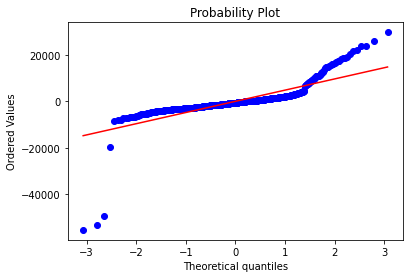

In [26]:
qqplot(b, X_train[DEP_VARS3], y_train)